<a href="https://colab.research.google.com/github/retrokyo/data_scripts_retrokyo/blob/master/default_est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installation
---
*   Pandas
*   Sklearn
*   Matplotlib
*   Seaborn

In [0]:
%%capture
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install seaborn

# Import packages
---
* Pandas as pd
* matlibplot.pyplot as plt
* seaborn as sns

* `from google.colab import drive` - Acts as a wrapper for pydrive to mount Google Drive files to the current working directory

In [0]:
import pathlib
from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.naive_bayes import MultinomialNB
sns.set_style('darkgrid')
palette_color = sns.color_palette('dark')

# Mount Drive
---
* *Requires interaction*



In [3]:
drive.mount('/content/drive')
data_path = pathlib.Path.cwd().joinpath('drive', 'My Drive', 'CollabData')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Prep and Descriptive Statistics
---
1.   Read csv into Dataframe
2.   Check number of defaults in the training data
3.   Descriptive statistics about dataframes
4.   Data Prep
5.   NaN Value  Exploration



>## Initial Data Prep

In [0]:
df_training = pd.read_csv(data_path.joinpath('cs-training.csv'))
df_test = pd.read_csv(data_path.joinpath('cs-test.csv'))

> Drop unneeded index

In [0]:
df_training.drop(columns='Unnamed: 0', inplace=True)
df_test.drop(columns='Unnamed: 0', inplace=True)

> Get data column names into list for iteration

In [0]:
data_columns = df_training.columns.values.tolist()
data_columns.remove('SeriousDlqin2yrs')

* Create Training Labels/Data
* Create Test Data

In [0]:
training_labels = deepcopy(df_training['SeriousDlqin2yrs'])
training_data = deepcopy(df_training[data_columns])
test_data = deepcopy(df_test[data_columns])

> ## Non-Default vs Default Bar Graph

In [0]:
default_graph_text = []
default_graph_text.append(len(df_training[df_training['SeriousDlqin2yrs'] == 0].index))
default_graph_text.append(len(df_training[df_training['SeriousDlqin2yrs'] == 1].index))

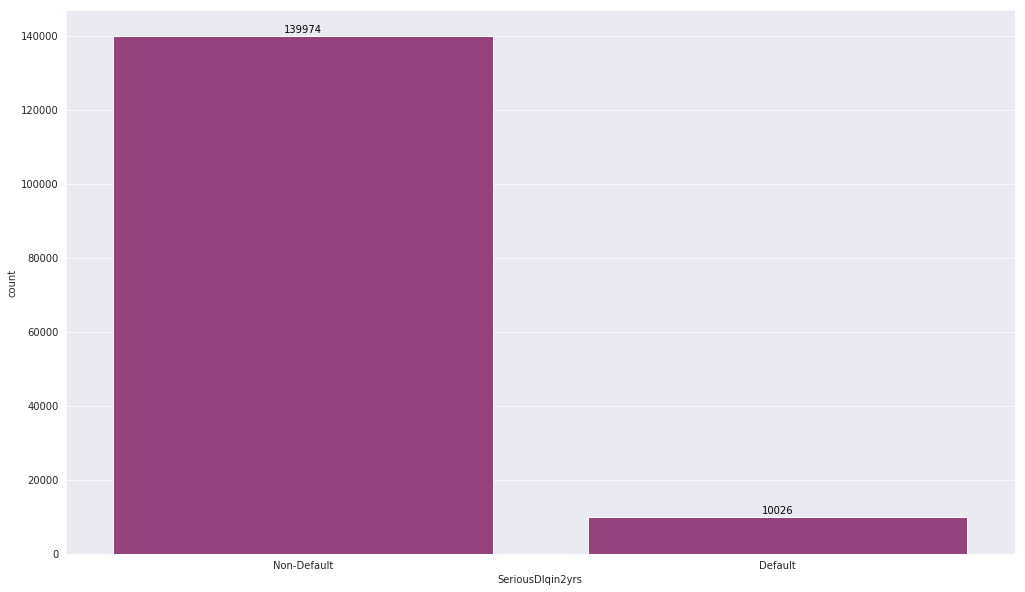

In [9]:
fig4, axs4 = plt.subplots(figsize=(17, 10))
sns.countplot(df_training['SeriousDlqin2yrs'], color=palette_color[6], ax=axs4)
axs4.set_xticklabels(['Non-Default', 'Default'])

for i, v in enumerate(default_graph_text):
  axs4.text(i, (v+1000), s=str(v), color='black', ha='center')

plt.savefig('TrainingDefaultCount.png', bbox_inches='tight')
plt.show()

> ## Training Data Violin Plot

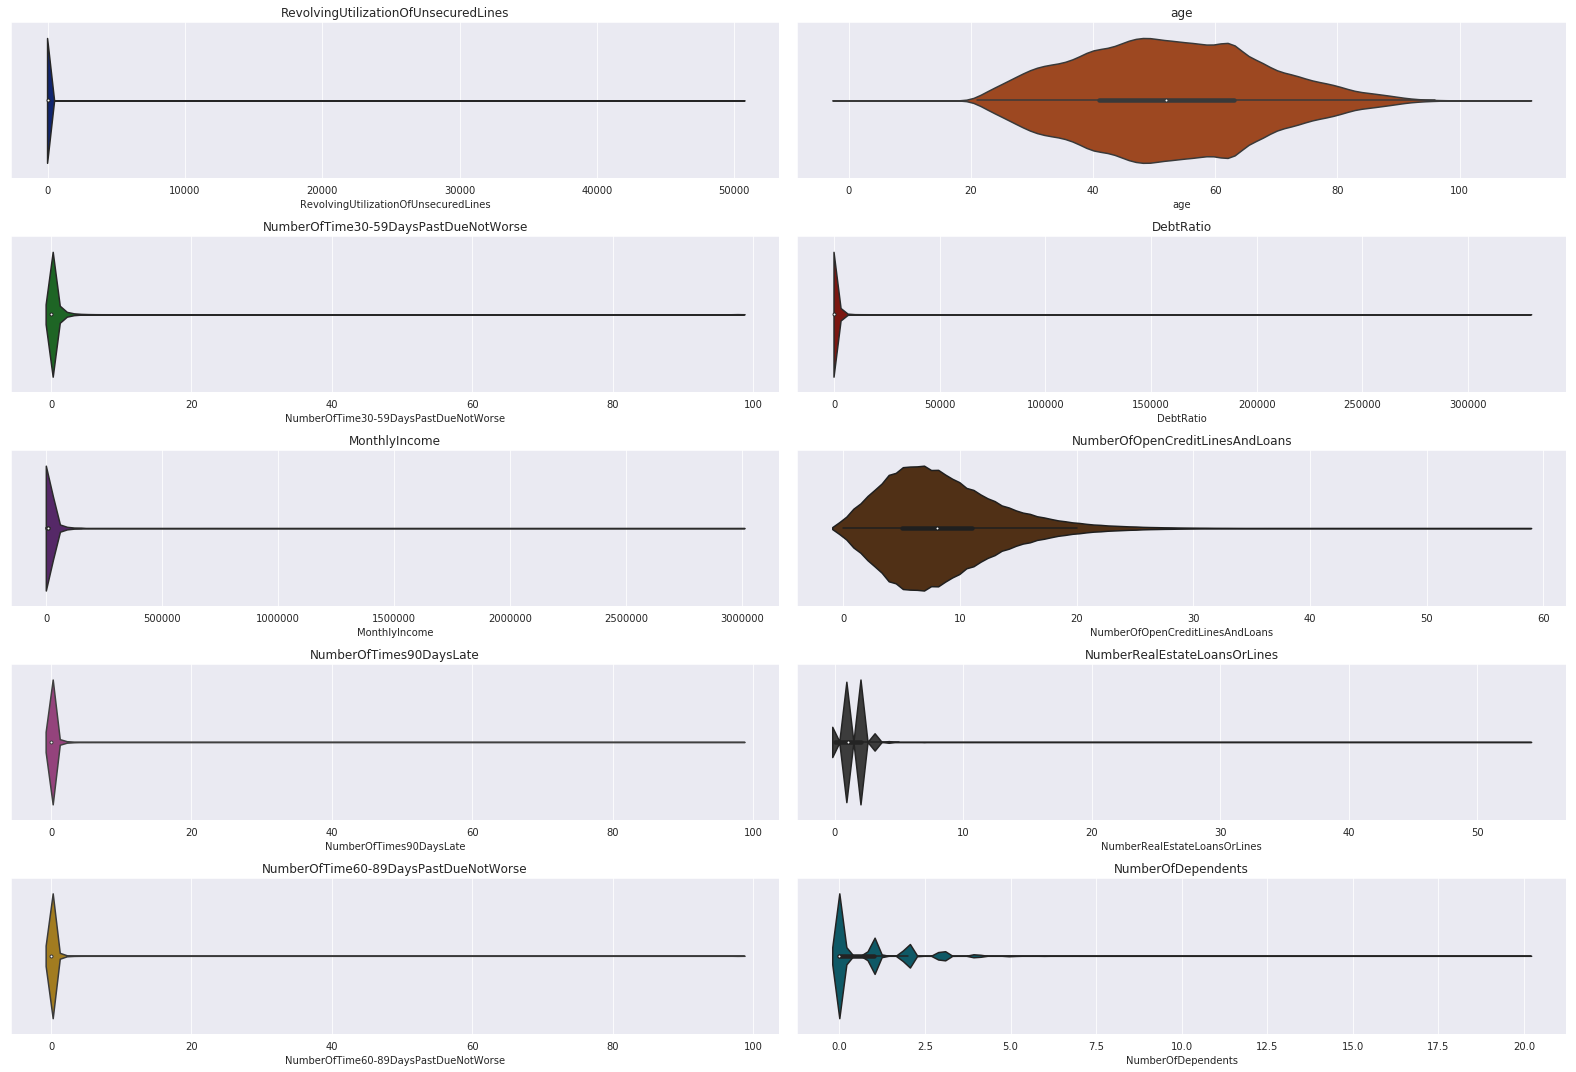

In [10]:
fig1, axs = plt.subplots(nrows=int(len(data_columns)/2), ncols=2, subplot_kw={'frame_on': True, 'autoscale_on': True},
                         figsize=(22, 15))
axs = axs.flatten()

for i in range(len(data_columns)):
  ax = axs[i]
  col_name = data_columns[i]
  ax.set_title(col_name)
  sns.violinplot(training_data[col_name], color=palette_color[i], ax=ax)

fig1.tight_layout()
plt.savefig('TrainingDataDist.png', bbox_inches='tight')
fig1.show()

> ## Test Data Violin Plots

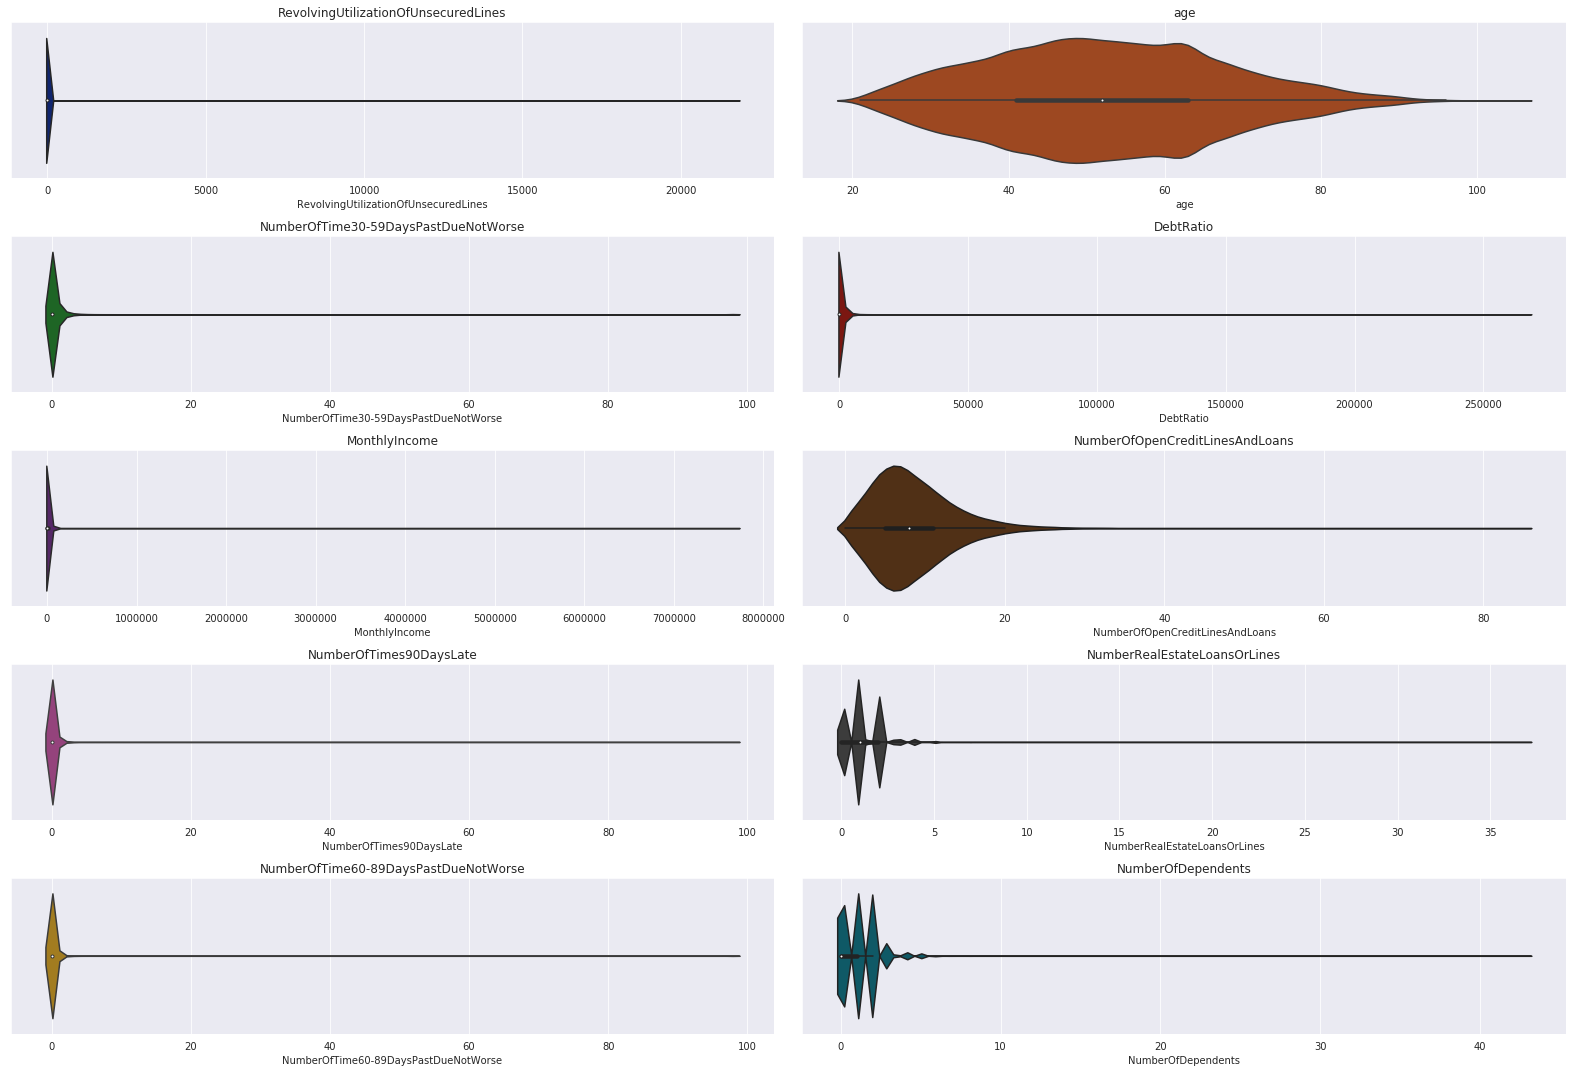

In [11]:
fig5, axs5 = plt.subplots(nrows=int(len(data_columns)/2), ncols=2, subplot_kw={'frame_on': True, 'autoscale_on': True},
                         figsize=(22, 15))
axs5 = axs5.flatten()

for i in range(len(data_columns)):
  ax = axs5[i]
  col_name = data_columns[i]
  ax.set_title(col_name)
  sns.violinplot(test_data[col_name], color=palette_color[i], ax=ax)

fig5.tight_layout()
plt.savefig('TestDataDist.png', bbox_inches='tight')
fig5.show()

> ## Training Data Descriptive Statistics


In [12]:
df_training.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


> ## Test Data Descriptive Statistics

In [13]:
df_test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


> ## Final Data Prep

* Check for Nan Values in datasets
* Show as percentage of the number of rows

In [14]:
training_size = len(training_data.index)
test_size = len(test_data)

training_data_na = training_data.isna().sum()

test_data_na = test_data.isna().sum()

print(' Training Data NaN Count \n')

for (index, value) in training_data_na.iteritems():
  print('{0}: {1}%'.format(index, round((value/training_size) * 100, 2)))

print('\n Test Data NaN Count \n')

for (index, value) in test_data_na.iteritems():
  print('{0}: {1}%'.format(index, round((value/test_size) * 100, 2)))

 Training Data NaN Count 

RevolvingUtilizationOfUnsecuredLines: 0.0%
age: 0.0%
NumberOfTime30-59DaysPastDueNotWorse: 0.0%
DebtRatio: 0.0%
MonthlyIncome: 19.82%
NumberOfOpenCreditLinesAndLoans: 0.0%
NumberOfTimes90DaysLate: 0.0%
NumberRealEstateLoansOrLines: 0.0%
NumberOfTime60-89DaysPastDueNotWorse: 0.0%
NumberOfDependents: 2.62%

 Test Data NaN Count 

RevolvingUtilizationOfUnsecuredLines: 0.0%
age: 0.0%
NumberOfTime30-59DaysPastDueNotWorse: 0.0%
DebtRatio: 0.0%
MonthlyIncome: 19.81%
NumberOfOpenCreditLinesAndLoans: 0.0%
NumberOfTimes90DaysLate: 0.0%
NumberRealEstateLoansOrLines: 0.0%
NumberOfTime60-89DaysPastDueNotWorse: 0.0%
NumberOfDependents: 2.59%


Fill NaN values with 0 in both training and test datasets

In [0]:
training_labels.fillna(0, inplace=True)
training_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Random Forest ML Model
---

> ## Instatiate and fit Random Forest Classifier from Sklearn

In [0]:
%%capture
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(training_data, training_labels)

> ## Visual Representation of Feature Importance




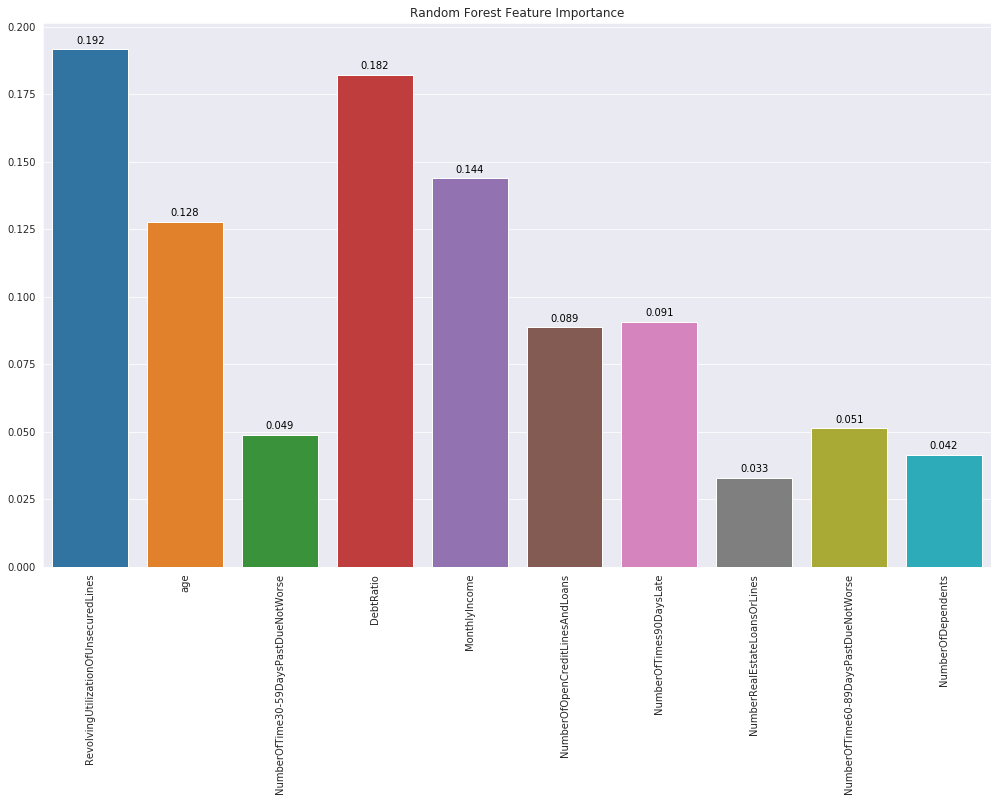

In [17]:
feature_coef = dict(zip(data_columns, forest.feature_importances_))
x_labels = list(feature_coef.keys())
y_values = list(feature_coef.values())

fig2, axs2 = plt.subplots(figsize=(17, 10))

sns.barplot(x_labels, y_values, ax=axs2)
axs2.set_title('Random Forest Feature Importance')

for i, v in enumerate(y_values):
  axs2.text(i, (v+0.002), s=str(round(v,3)), color='black', ha='center')
  
axs2.set_xticklabels(x_labels, rotation=90)
plt.savefig('RandomTreeFeatureImportance.png', bbox_inches='tight')
plt.show()

> ## Predict outcome of Test Data

In [0]:
forest_prediction = forest.predict(test_data)
df_test['RandomTreePrediction'] = forest_prediction

In [0]:
df_test['SeriousDlqin2yrs'] = forest.predict_proba(test_data)

In [0]:
default_graph_test_text = []
default_graph_test_text.append(len(df_test[df_test['RandomTreePrediction'] == 0].index))
default_graph_test_text.append(len(df_test[df_test['RandomTreePrediction'] == 1].index))

> ## Non-Default vs Default Random Forest Classifier Bar Graph

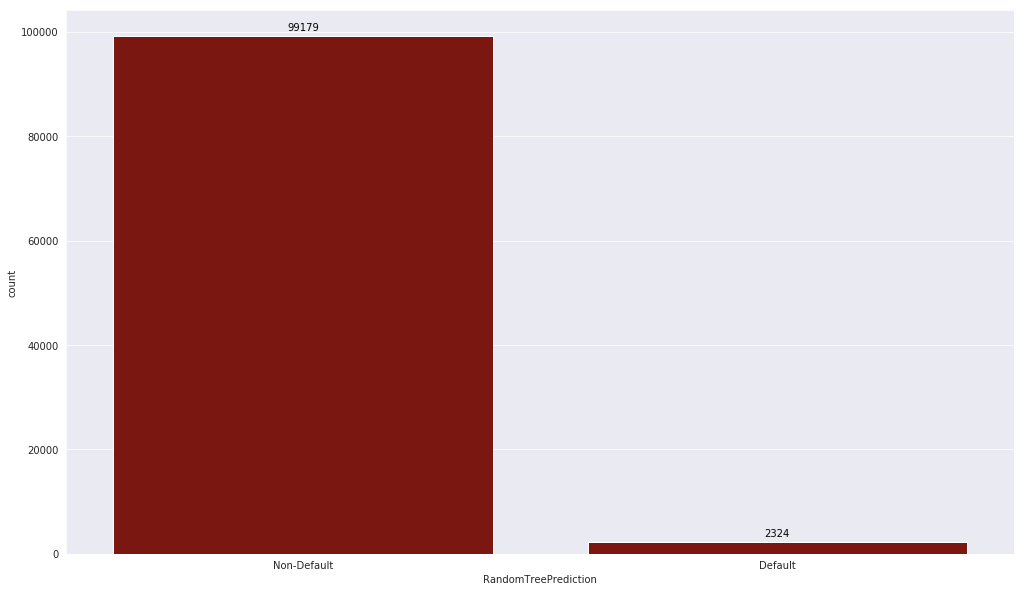

In [21]:
fig6, axs6 = plt.subplots(figsize=(17, 10))
sns.countplot(df_test['RandomTreePrediction'], color=palette_color[3], ax=axs6)
axs6.set_xticklabels(['Non-Default', 'Default'])

for i, v in enumerate(default_graph_test_text):
  axs6.text(i, (v+1000), s=str(v), color='black', ha='center')

plt.savefig('TestDefaultCount.png', bbox_inches='tight')
plt.show()

# Naive-Bayes Classification ML Model
---

> ## Instatiate and fit Random Forest Classifier from Sklearn


In [0]:
%%capture
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(training_data, training_labels)

In [0]:
nb_predict = naive_bayes_classifier.predict(test_data)
df_test['NBPrediction'] = nb_predict

In [0]:
nb_class_text = []
nb_class_text.append(len(df_test[df_test['NBPrediction'] == 0].index))
nb_class_text.append(len(df_test[df_test['NBPrediction'] == 1].index))

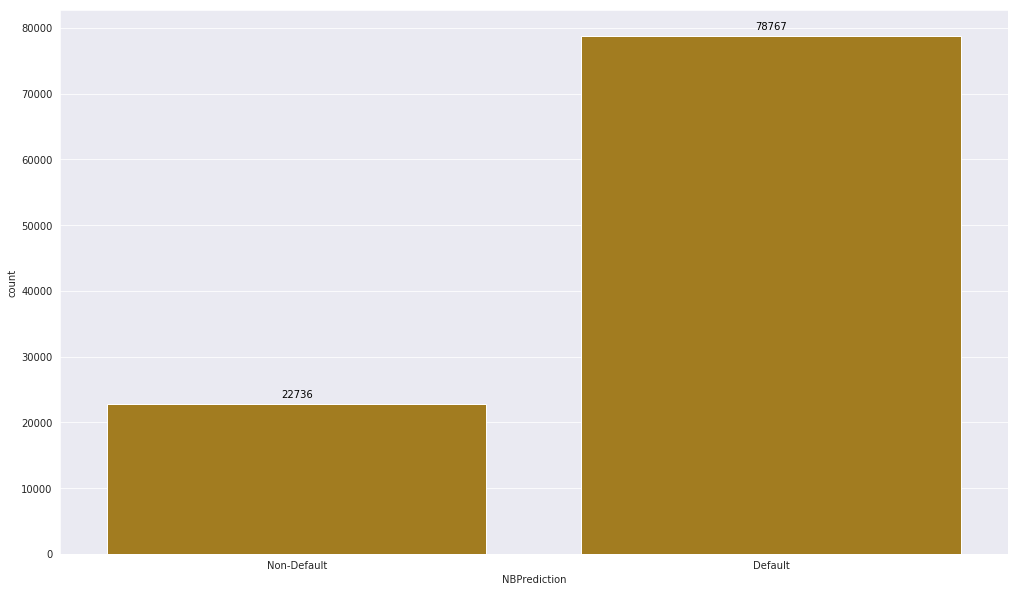

In [25]:
fig7, axs7 = plt.subplots(figsize=(17, 10))
sns.countplot(df_test['NBPrediction'], color=palette_color[8], ax=axs7)
axs7.set_xticklabels(['Non-Default', 'Default'])

for i, v in enumerate(nb_class_text):
  axs7.text(i, (v+1000), s=str(v), color='black', ha='center')

plt.savefig('NBClassCount.png', bbox_inches='tight')
plt.show()

# Comparison Graphs of Classification Outputs

In [0]:
df_test['ClassificationDiff'] = abs(df_test['RandomTreePrediction'] - df_test['NBPrediction'])

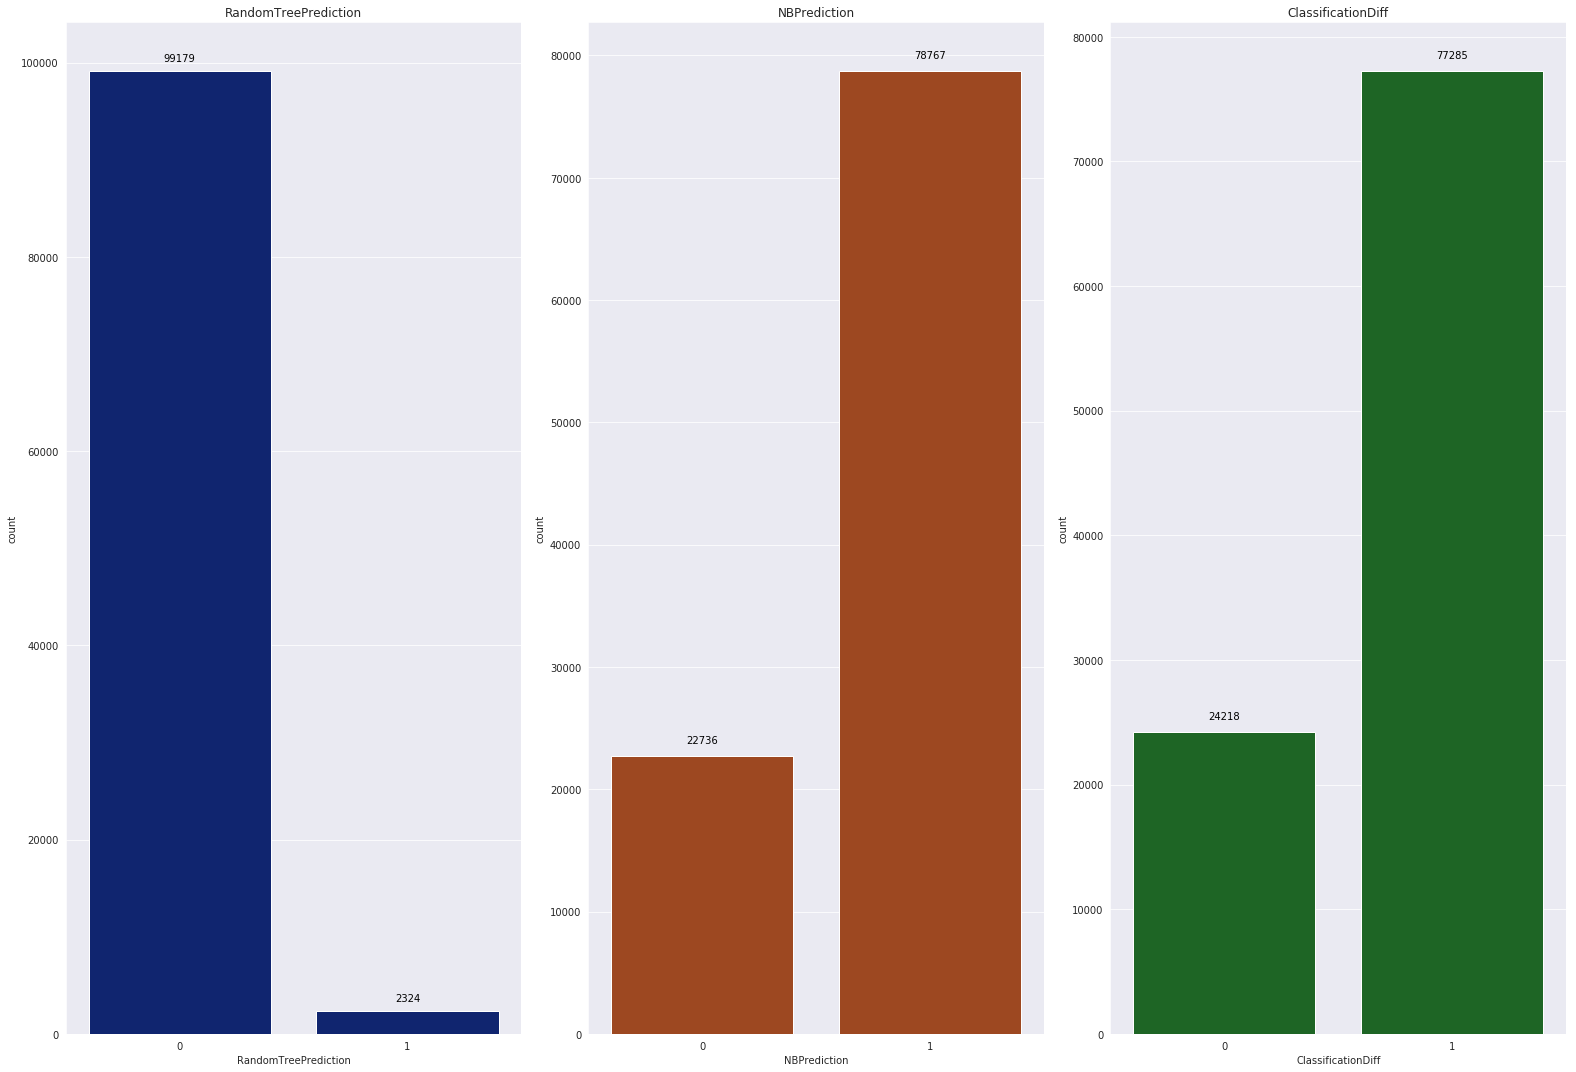

In [27]:
fig3, axs3 = plt.subplots(ncols=3, figsize=(22, 15))

graph_cols = ['RandomTreePrediction', 'NBPrediction', 'ClassificationDiff']
for i in range(len(graph_cols)):
  ax = axs3[i]
  col_name = graph_cols[i]
  ax.set_title(col_name)
  ax.set_xticklabels(['Non-Default', 'Default'])
  sns.countplot(df_test[col_name], color=palette_color[i], ax=ax, orient='v')

  ax_text = [len(df_test[df_test[col_name] == 0]), len(df_test[df_test[col_name] == 1])]
  
  for i, v in enumerate(ax_text):
    ax.text(i, (v+1000), s=str(v), color='black', ha='center')
  
fig3.tight_layout()
plt.savefig('PredictionClassifications.png', bbox_inches='tight')
plt.show()